# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
!curl -L -o /content/telco-customer-churn.zip https://www.kaggle.com/api/v1/datasets/download/blastchar/telco-customer-churn

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  171k  100  171k    0     0   418k      0 --:--:-- --:--:-- --:--:--  418k


In [2]:
!unzip -o /content/telco-customer-churn.zip -d /content/

Archive:  /content/telco-customer-churn.zip
  inflating: /content/WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/tmp/ipython-input-1854177178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


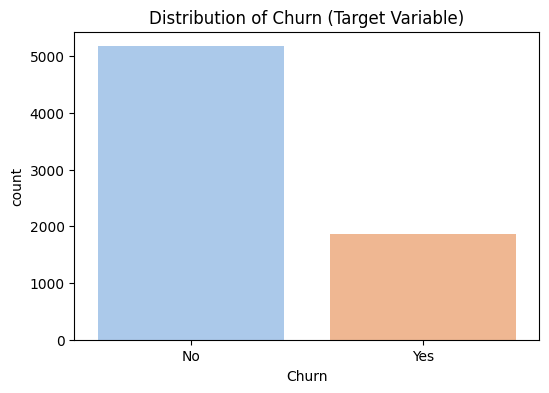

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribution of Churn (Target Variable)')
plt.show()

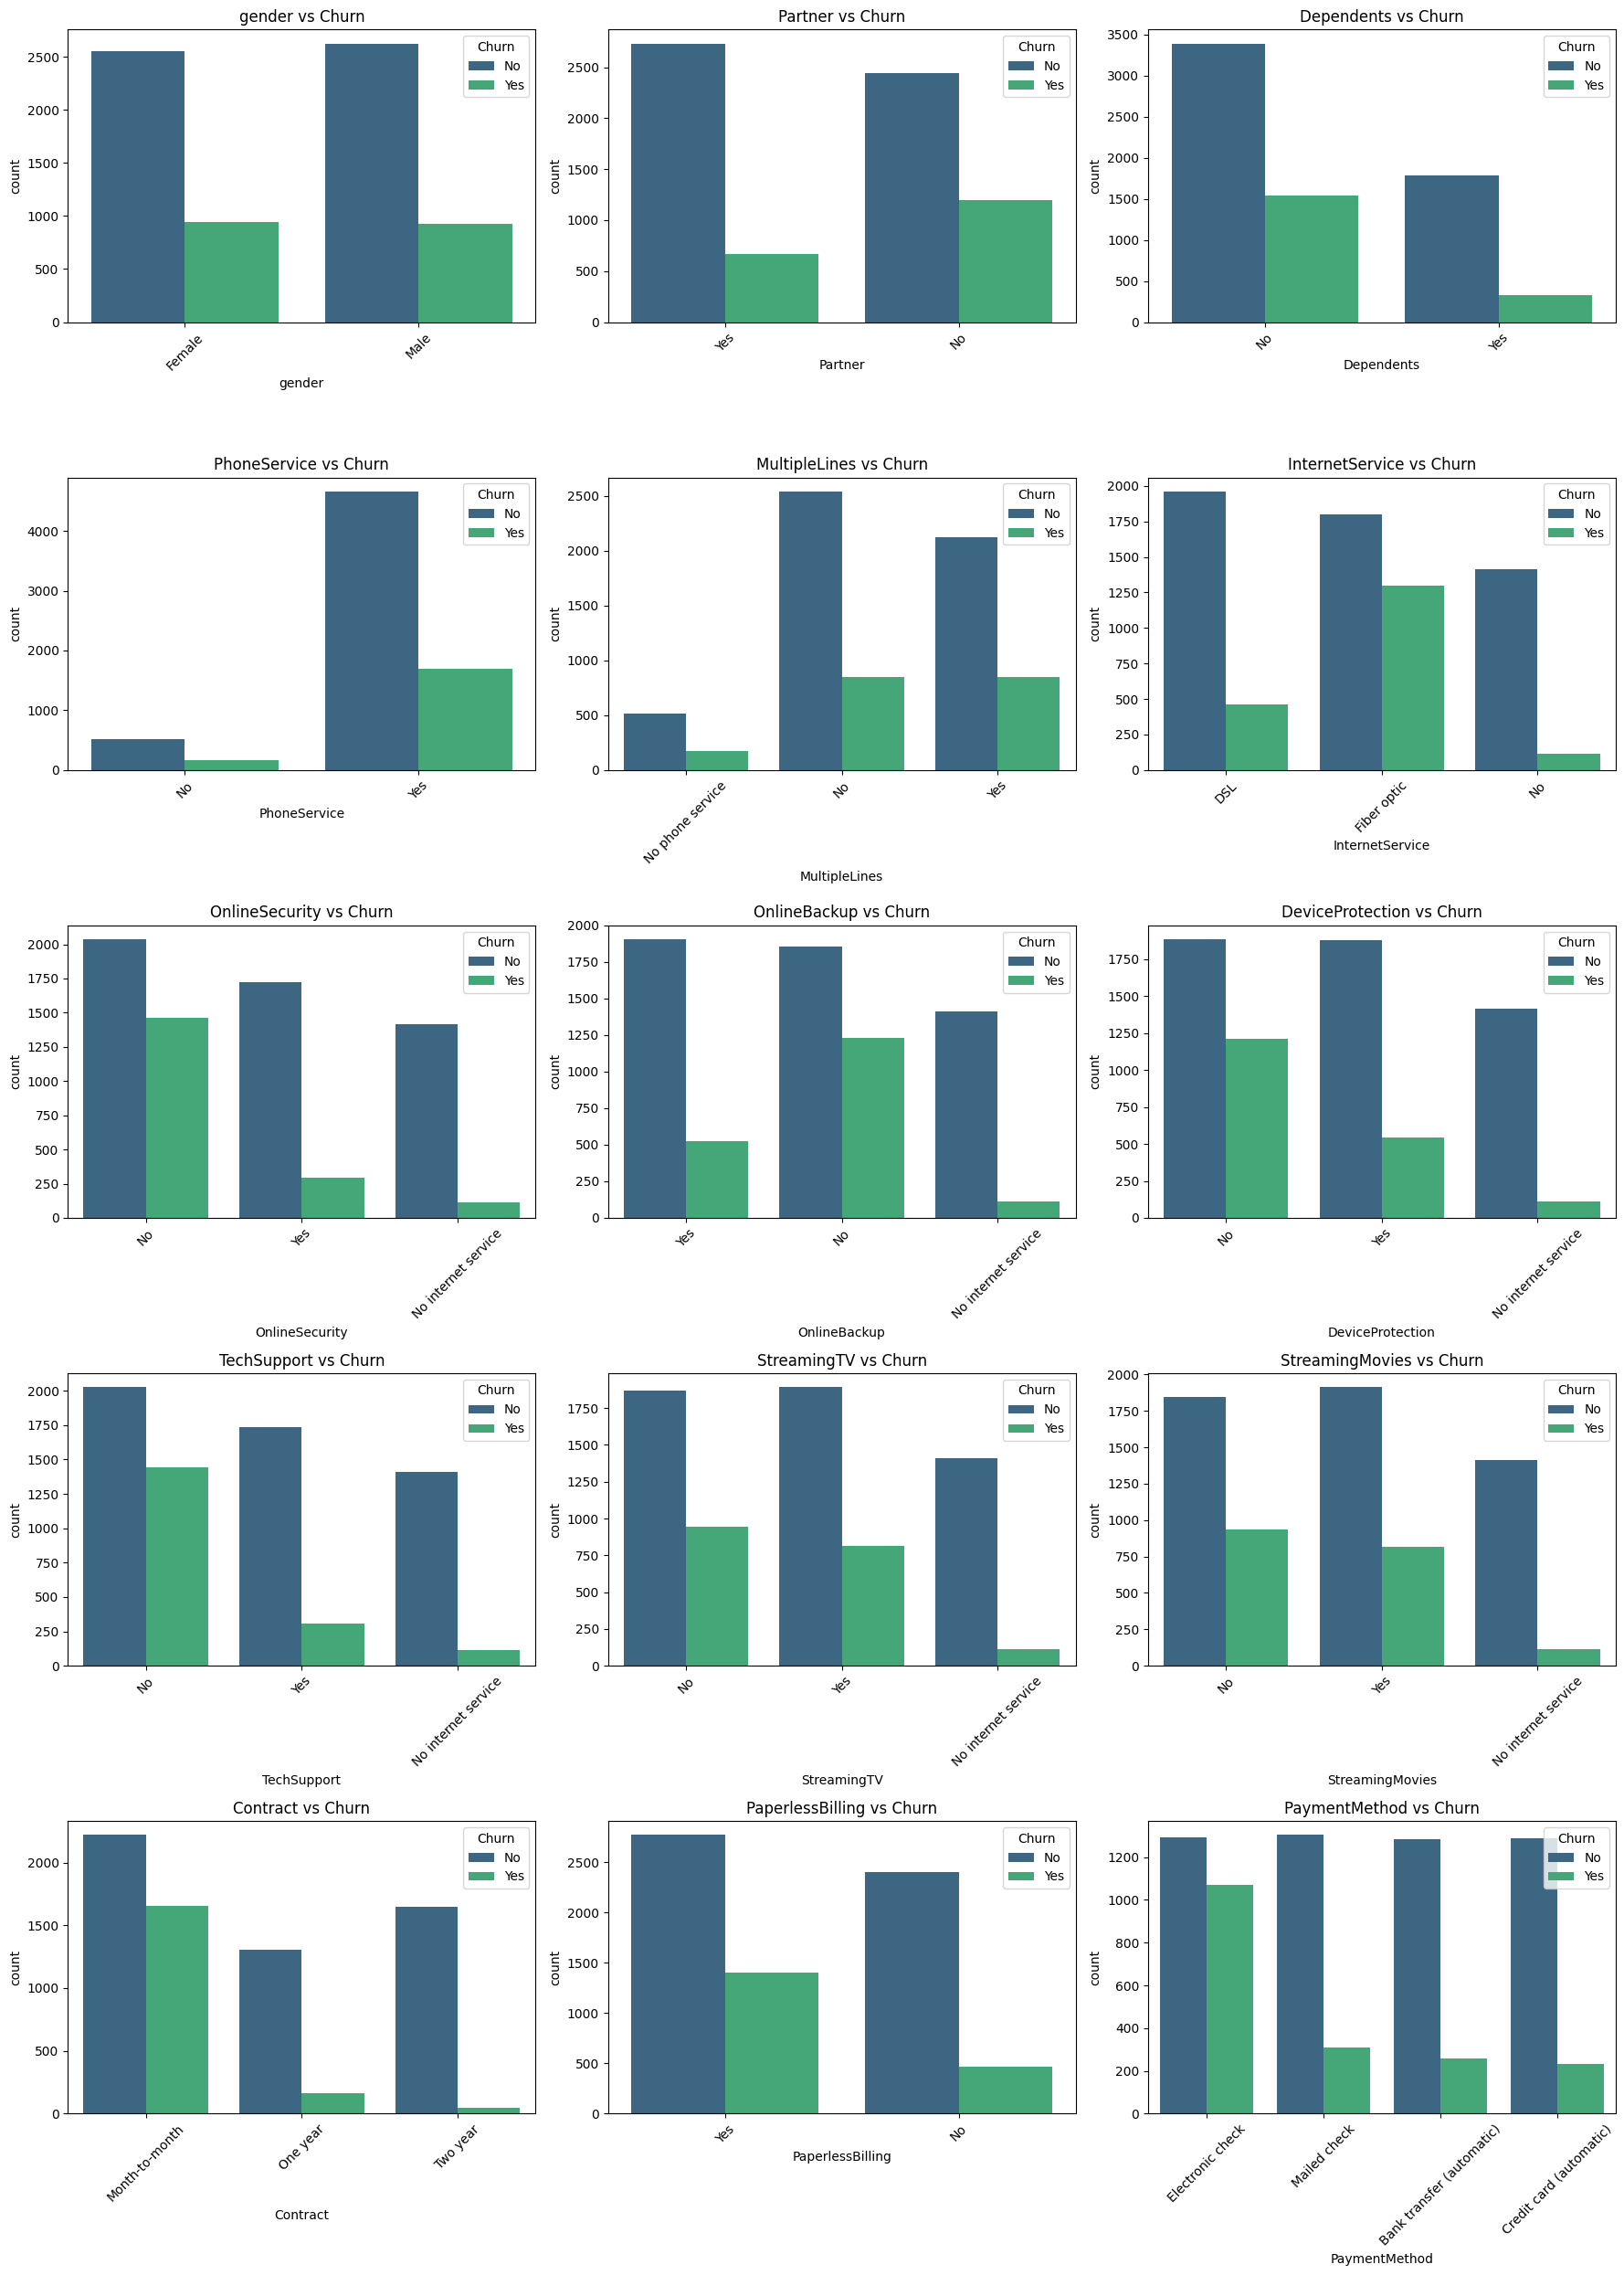

In [7]:
import math

cat_cols = [col for col in df.columns if df[col].dtype == 'object'
            and col not in ['customerID', 'TotalCharges', 'Churn']]

num_rows = math.ceil(len(cat_cols) / 3)

plt.figure(figsize=(18, num_rows * 5))

for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1739652115.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
/tmp/ipython-input-1739652115.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set2')


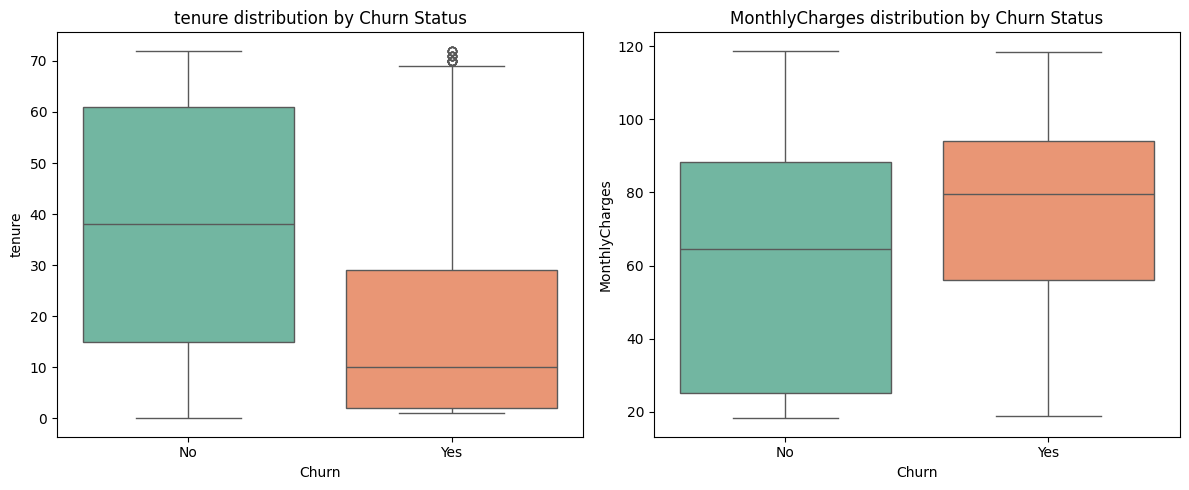

In [8]:
num_cols = ['tenure', 'MonthlyCharges']

plt.figure(figsize=(12, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
    plt.title(f'{col} distribution by Churn Status')

plt.tight_layout()
plt.show()

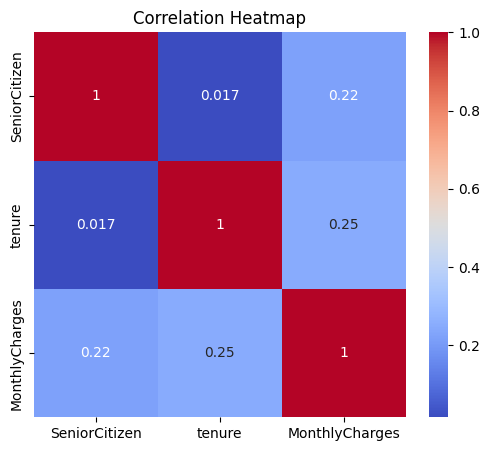

In [9]:
correlation_matrix = df.select_dtypes(["int", "float"]).corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

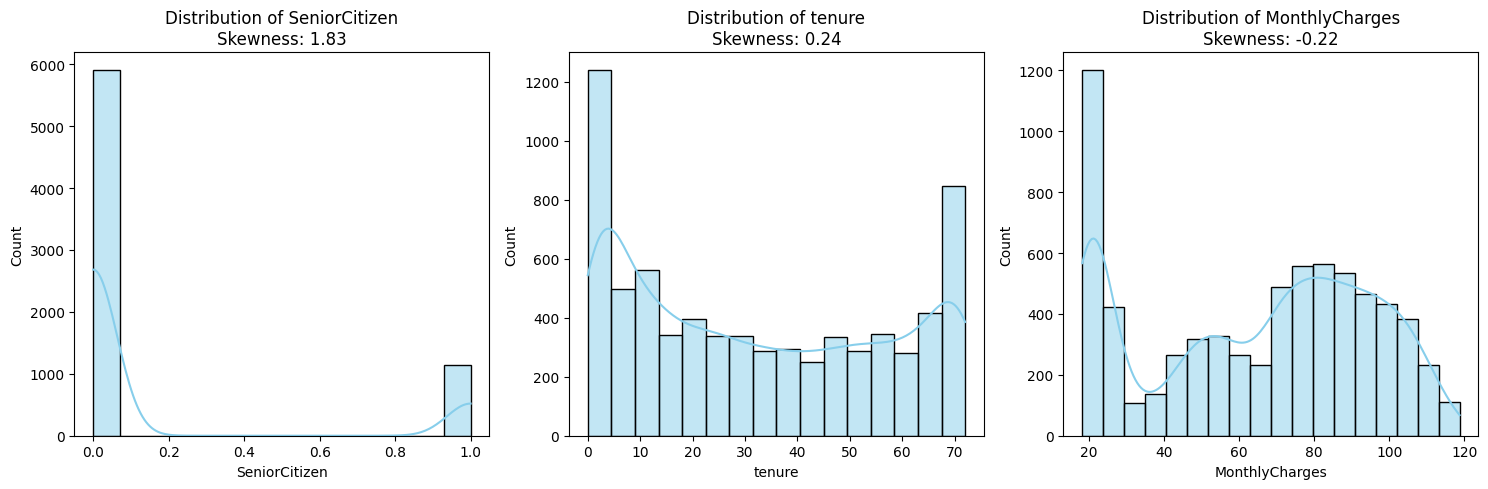

In [10]:
numerical_cols = df.select_dtypes(["int", "float"]).columns.tolist()

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}\nSkewness: {df[col].skew():.2f}')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
print(df.duplicated().sum())

0


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
print(f"Missing values found: {df['TotalCharges'].isnull().sum()}")

Missing values found: 11


In [15]:
df['TotalCharges'].fillna(0, inplace=True)

/tmp/ipython-input-171940771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
bins = [0, 12, 48, 72]

labels = ['New', 'Existing', 'Loyal']

df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

print(df[['tenure', 'TenureGroup']].head(10))

   tenure TenureGroup
0       1         New
1      34    Existing
2       2         New
3      45    Existing
4       2         New
5       8         New
6      22    Existing
7      10         New
8      28    Existing
9      62       Loyal


In [18]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df_scaled[cols_to_scale].describe().round(2))

        tenure  MonthlyCharges  TotalCharges
count  7043.00         7043.00       7043.00
mean     -0.00           -0.00         -0.00
std       1.00            1.00          1.00
min      -1.32           -1.55         -1.01
25%      -0.95           -0.97         -0.83
50%      -0.14            0.19         -0.39
75%       0.92            0.83          0.66
max       1.61            1.79          2.83


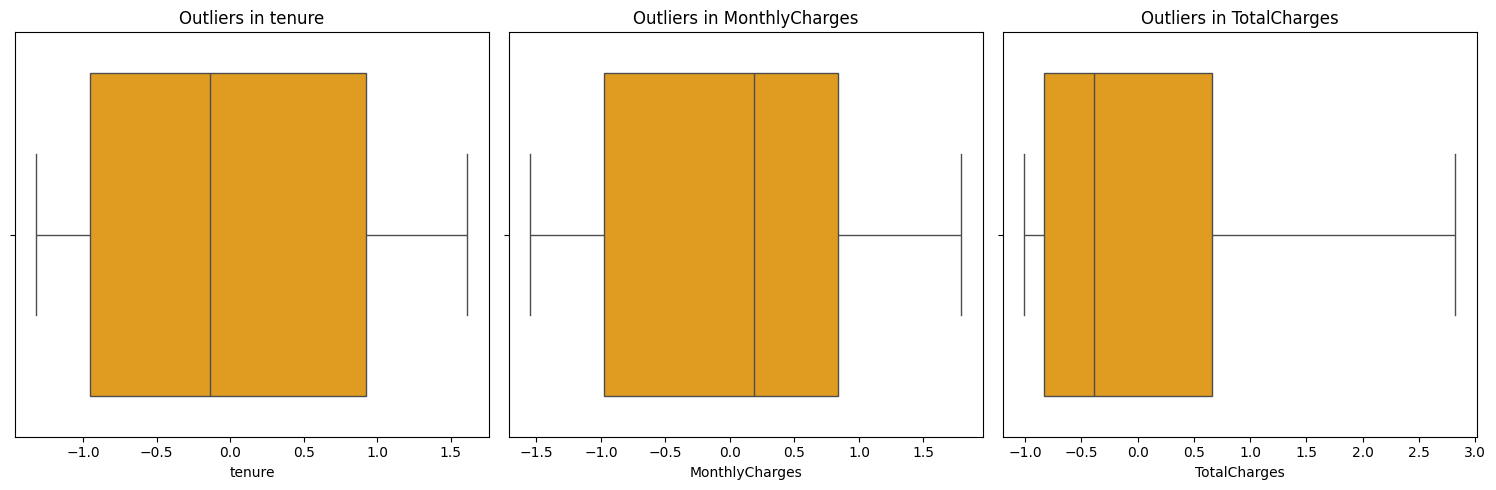

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_scaled[col], color='orange')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

In [20]:
cat_cols.append('TenureGroup')

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_scaled['Churn'] = le.fit_transform(df_scaled['Churn'])

print(df_scaled['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [22]:
at_cols = [col for col in df.columns if df[col].dtype == 'object' or col == 'TenureGroup']

print(f"Columns to encode: {cat_cols}")

df_clean = pd.get_dummies(df_scaled, columns=cat_cols, drop_first=True)

print("New dataframe shape:", df_clean.shape)
df_clean.head()

Columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']
New dataframe shape: (7043, 34)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Existing,TenureGroup_Loyal
0,7590-VHVEG,0,-1.277445,-1.160323,-0.992611,0,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
1,5575-GNVDE,0,0.066327,-0.259629,-0.172165,0,True,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,3668-QPYBK,0,-1.236724,-0.362660,-0.958066,1,True,False,False,True,...,False,False,False,False,True,False,False,True,False,False
3,7795-CFOCW,0,0.514251,-0.746535,-0.193672,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,9237-HQITU,0,-1.236724,0.197365,-0.938874,1,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False


In [23]:
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop('customerID', axis=1)

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   float64
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [28]:
df_clean.to_csv("telco_churn_clean.csv")